# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)


In [1]:
# importing stuff
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# fetching data and printing out to look at it
df = pd.read_csv('./hw data/airbnb_hw.csv')
df.head(20)

# make every price a number and not a string
df['Price'] = pd.to_numeric(df['Price'], errors='coerce') 

# create a missing dummy, 1 = is missing & 0 = non-null
df['Price_nan'] = df['Price'].isnull() 

# describe the Price column
print("After cleaning: \n" , df['Price'].describe())

# print out number of missing values by using the Price_nan column
print(" ")
print("Total missing values: " , sum(df['Price_nan']))

After cleaning: 
 count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: Price, dtype: float64
 
Total missing values:  181


2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 


In [3]:
# fetching and printing the data
da = pd.read_csv('./hw data/mn_police_use_of_force.csv')
da.head(20)

# print out what are the possible values for the column
print(da['subject_injury'].unique())

# replacing the NaN with np.nan
da['subject_injury'] = da['subject_injury'].replace('NaN', np.nan)

# print out number of values for each option, use dropna=False to include NaN in the counts
print("options: \n" , da['subject_injury'].value_counts(dropna=False))

# number of NaN values 
nan_count = da['subject_injury'].isna().sum()
# total number of values
total = da.shape[0] 
# proportion of missing values 
prop = nan_count / total

# print proportion 
print(" ")
print("Proportion of missing values:", prop)


[nan 'No' 'Yes']
options: 
 subject_injury
NaN    9848
Yes    1631
No     1446
Name: count, dtype: int64
 
Proportion of missing values: 0.7619342359767892


In [4]:
# cross-tabulating subject_injury and force_type 
c = pd.crosstab(da['force_type'], da['subject_injury'], dropna=False)
print(c)

subject_injury                 No   Yes   NaN
force_type                                   
Baton                           0     2     2
Bodily Force                 1093  1286  7051
Chemical Irritant             131    41  1421
Firearm                         2     0     0
Gun Point Display              33    44    27
Improvised Weapon              34    40    74
Less Lethal                     0     0    87
Less Lethal Projectile          1     2     0
Maximal Restraint Technique     0     0   170
Police K9 Bite                  2    44    31
Taser                         150   172   985


The proportion of values for subject_injury that are missing is 0.762. Yes, this is a concern. A proportion of 0.762 means that 76% of the values are missing, which is the majority of the values for this category. Considering that if the subject was injured or not is kind of an important category, it is very concerning that this column is missing the majority of its data values. 

The cross-tabulate results shows the options for subject injury as the columns and options for force type as the rows. We can see that for 6 out of the 11 types of force have more missing values than either a "yes" or "no" for subject injury when that force type was used. This is also concerning because that is more than half of the force types. 

Ones that are especially notable are for Bodily Force, Chemical Irritant, Less Lethal, Maximal Restraint Technique, and Taser. These are the force types that have the most discrepancies between the "yes" or "no" and NaN for subject injury. It could be safe to assume that the reason for the high number of missing values for these force types is because these are some of the stronger and more violent force types, and the police officers don't want to report that there was subject injury when they used more force than might have been necessary. 

3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.

In [5]:
# fetching and printing data
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
db = pd.read_csv(url,low_memory=False)
db.head(20)

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
3,CDI00036,6,M,B,1989,27,3,27,0,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
4,CDI00038,7,F,W,1988,28,3,28,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...
5,CDI00039,8,M,B,1978,39,4,39,0,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
6,CDI00041,9,F,B,1981,35,3,35,1,1,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...
7,CDI00043,10,M,B,1999,18,2,18,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...
8,CDI00044,11,M,B,1990,27,3,27,1,1,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
9,CDI00046,12,M,W,1996,21,2,21,1,1,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


In [6]:
# printing out unique values and their counts
print(db['WhetherDefendantWasReleasedPretrial'].unique())
print(db['WhetherDefendantWasReleasedPretrial'].value_counts(dropna=False))

# replace missing values, aka '9', with np.nan 
db['WhetherDefendantWasReleasedPretrial'] = db['WhetherDefendantWasReleasedPretrial'].replace(9, np.nan)

# print out unique values and their counts again
print(" ")
print(db['WhetherDefendantWasReleasedPretrial'].unique())
print(db['WhetherDefendantWasReleasedPretrial'].value_counts(dropna=False))

[9 0 1]
WhetherDefendantWasReleasedPretrial
1    19154
0     3801
9       31
Name: count, dtype: int64
 
[nan  0.  1.]
WhetherDefendantWasReleasedPretrial
1.0    19154
0.0     3801
NaN       31
Name: count, dtype: int64


4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [7]:
# printing out all unique values for ImposedSentenceAllChargeInContactEvent
print(db['ImposedSentenceAllChargeInContactEvent'].unique())
print("fixing....")

# replace any strings of just spaces with 0
db['ImposedSentenceAllChargeInContactEvent_fix'] = db['ImposedSentenceAllChargeInContactEvent'].replace(' ', '0.00')
# change strings to floats, rounding to 2 decimal places
db['ImposedSentenceAllChargeInContactEvent_fix'] = (
    pd.to_numeric(db['ImposedSentenceAllChargeInContactEvent_fix'], errors='coerce')
    .round(2)
)
# get rid of scientific notation, for better readability 
db['ImposedSentenceAllChargeInContactEvent_fix'] = db['ImposedSentenceAllChargeInContactEvent_fix'].map('{:.2f}'.format)

# print out new values
print(db['ImposedSentenceAllChargeInContactEvent_fix'].unique())

[' ' '60' '12' '.985626283367556' '36' '6' '24' '5.91375770020534' '120'
 '72' '11.9917864476386' '0' '2.95687885010267' '84' '108' '300' '240'
 '180' '4' '96' '2' '54' '.328542094455852' '44' '5' '115' '132' '48'
 '258' '34' '76' '.164271047227926' '.131416837782341' '111' '9' '3'
 '1.97125256673511' '36.9856262833676' '.0657084188911704'
 '35.4928131416838' '106.492813141684' '8' '35' '18.3141683778234' '480'
 '32' '93' '234' '732' '1.16427104722793' '4.6570841889117' '21' '7'
 '4.49281314168378' '18' '600' '43.1642710472279' '179' '52' '30' '20'
 '192' '702' '14' '55' '53' '11.9055441478439' '114' '35.0061601642711'
 '68' '.657084188911704' '46.6242299794661' '102' '65' '200' '57'
 '24.3285420944559' '12.1642710472279' '117' '81.4928131416838'
 '22.4928131416838' '1980' '3.6570841889117' '56' '10' '2.79260780287474'
 '1' '47' '22' '1500' '40' '284' '11' '118' '42' '162' '156'
 '47.2956878850103' '105' '51' '246' '29' '75' '324' '360'
 '34.4804928131417' '120.328542094456' '59.926078

In [8]:
# printing out all unique values for SentenceTypeAllChargesAtConvictionInContactEvent 
print(db['SentenceTypeAllChargesAtConvictionInContactEvent'].unique())

# cross-tabulating ImposedSentenceAllChargeInContactEvent and SentenceTypeAllChargesAtConvictionInContactEvent
c = pd.crosstab(db['ImposedSentenceAllChargeInContactEvent_fix'], db['SentenceTypeAllChargesAtConvictionInContactEvent'], dropna=False)
print(c)

[9 0 1 4 2]
SentenceTypeAllChargesAtConvictionInContactEvent     0   1  2     4    9
ImposedSentenceAllChargeInContactEvent_fix                              
0.00                                              4953   0  0  8779  274
0.03                                                 0   6  0     0    0
0.07                                                 3  21  0     0    0
0.10                                                 2   6  0     0    0
0.13                                                 4  10  0     0    0
...                                                ...  .. ..   ...  ...
98.00                                                0   0  1     0    0
98.96                                                0   0  1     0    0
99.00                                                0   1  0     0    0
99.33                                                0   1  0     0    0
99.49                                                0   1  0     0    0

[480 rows x 5 columns]


I chose to convert the string of numbers in the column `ImposedSentenceAllChargeInContactEvent` to floats that were rounded to two decimal places. First, changing them to floats from strings allows descriptive statistics - such as mean, median, mode, standard deviation, quartiles ranges, etc - to be performed on this column. Second, rounding to two decimal places increases the readability of the column, but still preserves the values as they were inputted. Additionally, looking at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable, we can see that there are 5 different categories of Sentence Type. Using a cross table, we can look at the relationship between the two variables and see if there are any correlation between the 5 different types of Sentence Type and the Imposed Sentence. 

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.

In [9]:
# fetching data
# pip install xlrd
ds = pd.read_excel('./hw data/shark_attacks.xls')
ds.head(20)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,...,Bronze whaler,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,...,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,...,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2024-12-29 00:00:00,2024.0,Unprovoked,Egypt,North of Marsa Alam,Red Sea,SCUBA Diving,Peppino Fappani,M,69,...,Reportedly a Tiger Shark,Todd Smith : Kevin McMurray Trackingsharks .co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2024-12-29 00:00:00,2024.0,Unprovoked,Egypt,North of Marsa Alam,Red Sea,SCUBA Diving,Gianluca Di Gioia,M,48,...,Reportedly a Tiger Shark,Todd Smith : Kevin McMurray Trackingsharks .co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2024-12-28 00:00:00,2024.0,Unprovoked,Australia,Queensland,Humpy Island Great Keppel Island,Spearfishing,Luke Walford,M,40,...,Unknown,Todd Smith Glen Folkard ABC News: The North We...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2024-12-02 00:00:00,2024.0,Unprovoked,Australia,Queensland,Curtis Island Near Gladstone QLD central coast,Spearfishing,Not stated,M,60+,...,Not stated,Glen Folkard GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2024-12-01 00:00:00,2024.0,Unprovoked,Australia,Western Australia,Greenough River Mouth Beach Cape Burney 12km s...,Surfing,James Sweetman (child),M,?,...,1m shark species unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2. Drop any columns that do not contain data.

In [10]:
# creates new data frame, ds_clean, which drops any columns where all the values are NaN
ds_clean = ds.dropna(axis = 1, how='all')

# print out first 10 rows to check
ds_clean.head(10)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,...,Bronze whaler,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,...,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,...,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2024-12-29 00:00:00,2024.0,Unprovoked,Egypt,North of Marsa Alam,Red Sea,SCUBA Diving,Peppino Fappani,M,69,...,Reportedly a Tiger Shark,Todd Smith : Kevin McMurray Trackingsharks .co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2024-12-29 00:00:00,2024.0,Unprovoked,Egypt,North of Marsa Alam,Red Sea,SCUBA Diving,Gianluca Di Gioia,M,48,...,Reportedly a Tiger Shark,Todd Smith : Kevin McMurray Trackingsharks .co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2024-12-28 00:00:00,2024.0,Unprovoked,Australia,Queensland,Humpy Island Great Keppel Island,Spearfishing,Luke Walford,M,40,...,Unknown,Todd Smith Glen Folkard ABC News: The North We...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2024-12-02 00:00:00,2024.0,Unprovoked,Australia,Queensland,Curtis Island Near Gladstone QLD central coast,Spearfishing,Not stated,M,60+,...,Not stated,Glen Folkard GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2024-12-01 00:00:00,2024.0,Unprovoked,Australia,Western Australia,Greenough River Mouth Beach Cape Burney 12km s...,Surfing,James Sweetman (child),M,?,...,1m shark species unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?

In [11]:
# printing out the range of values for Year
print(ds_clean['Year'].unique())

# printing stats 
print(ds_clean['Year'].describe())

[2025. 2024. 2026. 2023. 2022. 2021. 2020. 2019. 2018. 2017.   nan 2016.
 2015. 2014. 2013. 2012. 2011. 2010. 2009. 2008. 2007. 2006. 2005. 2004.
 2003. 2002. 2001. 2000. 1999. 1998. 1997. 1996. 1995. 1984. 1994. 1993.
 1992. 1991. 1990. 1989. 1969. 1988. 1987. 1986. 1985. 1983. 1982. 1981.
 1980. 1979. 1978. 1977. 1976. 1975. 1974. 1973. 1972. 1971. 1970. 1968.
 1967. 1966. 1965. 1964. 1963. 1962. 1961. 1960. 1959. 1958. 1957. 1956.
 1955. 1954. 1953. 1952. 1951. 1950. 1949. 1948. 1848. 1947. 1946. 1945.
 1944. 1943. 1942. 1941. 1940. 1939. 1938. 1937. 1936. 1935. 1934. 1933.
 1932. 1931. 1930. 1929. 1928. 1927. 1926. 1925. 1924. 1923. 1922. 1921.
 1920. 1919. 1918. 1917. 1916. 1915. 1914. 1913. 1912. 1911. 1910. 1909.
 1908. 1907. 1906. 1905. 1904. 1903. 1902. 1901. 1900. 1899. 1898. 1897.
 1896. 1895. 1894. 1893. 1892. 1891. 1890. 1889. 1888. 1887. 1886. 1885.
 1884. 1883. 1882. 1881. 1880. 1879. 1878. 1877. 1876. 1875. 1874. 1873.
 1872. 1871. 1870. 1869. 1868. 1867. 1866. 1865. 18

In [12]:
# only keep rows with attacks after 1940
ds_clean = ds_clean[ds_clean["Year"] >= 1940]
ds_clean.tail(10)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
5450,23-Jan-1940,1940.0,Unprovoked,AUSTRALIA,New South Wales,"North Brighton, Botany Bay",Swimming,Maxwell Farrin,M,13,...,3 m [10'] shark,"V.M. Coppleson (1958), p.69; A. Sharpe, pp.65-66",1940.01.23-Farrin.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.01.23,1940.01.23,1540.0,NaN,NaN
5451,15-Jan-1940,1940.0,Unprovoked,AUSTRALIA,Queensland,"Surfers Paradise, near Southport",Swimming,Douglas Bright,M,22,...,NaN,"V.M. Coppleson (1958), pp. 93 & 238",1940.01.15-Bright.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.01.15,1940.01.15,1539.0,NaN,NaN
5452,07-Jan-1940,1940.0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,"Warner Beach, South Coast",Swimming,Frederick Aubrey Hooper,M,18,...,2.4 m [8'] shark,"R. Guy, T. Jucker & M. Levine, GSAF",1940.01.07-Hooper.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.01.07,1940.01.07,1538.0,NaN,NaN
5453,01-Jan-1940,1940.0,Unprovoked,AUSTRALIA,Queensland,"Malagil, Barrier Reef",Diving for trochus,native diver,M,NaN,...,NaN,"J. Green, p.33; V.M. Coppleson (1958), p.245",1940.01.01-native-diver.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.01.01,1940.01.01,1537.0,NaN,NaN
5454,Ca. 1940,1940.0,Watercraft,SLOVENIA,Adriatic Sea,Koper,Boating,NaN,NaN,NaN,...,White shark,A. De Maddalena; M. Zuffa (pers. Comm.),1940.00.00.f-boat-Slovenia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.00.00.f,1940.00.00.f,1536.0,NaN,NaN
5455,1940,1940.0,Unprovoked,NEW GUINEA,Bwagaoia,"Bagalina, North coast Misima Island",NaN,small girl,F,NaN,...,NaN,"A. Bleakley; A. M. Rapson, p.148",1940.00.00.e-small-girl.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.00.00.e,1940.00.00.e,1535.0,NaN,NaN
5456,1940,1940.0,Unprovoked,PAPUA NEW GUINEA,Western Papuan Gulf,Kerema,male,a native,NaN,NaN,...,NaN,"Papuan Villager, 11/1940",1940.00.00.d-Kerema.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.00.00.d,1940.00.00.d,1534.0,NaN,NaN
5457,1940,1940.0,Invalid,SOUTH AFRICA,Eastern Cape Province,Kidd's Beach,Swimming,NaN,NaN,NaN,...,Questionable incident,"D. Davies, p. 102",1940.00.00.c-KiddsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.00.00.c,1940.00.00.c,1533.0,NaN,NaN
5458,1940,1940.0,Invalid,SOUTH AFRICA,KwaZulu-Natal,Winkelspruit,NaN,Indian female,F,NaN,...,Questionable incident,"V.M. Coppleson (1958), p.247; SAF Case #161. U...",1940.00.00.b-IndianFemale.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.00.00.b,1940.00.00.b,1532.0,NaN,NaN
5459,1940,1940.0,Invalid,SOUTH AFRICA,Eastern Cape Province,"Kowie River Mouth, Port Alfred",Standing in water with child in her arms,female,F,NaN,...,Questionable incident,"E. Skaife, V. M. Coppleson (1958), p.247; M. ...",1940.00.00.a-Woman-Kowie.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1940.00.00.a,1940.00.00.a,1531.0,NaN,NaN


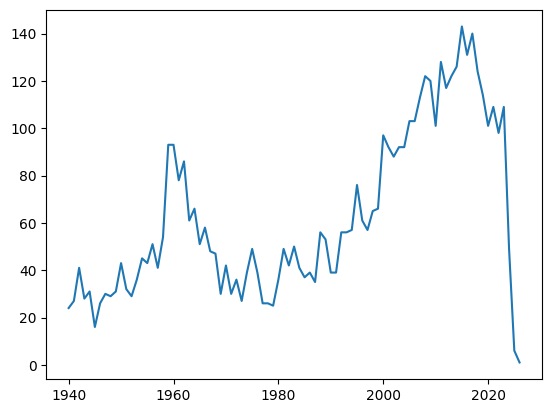

In [13]:
# create variable to count shark attack frequency for each year
event_counts = ds_clean["Year"].value_counts().sort_index()
# plot line graph with time on x axis and frequency on y axis
plt.plot(event_counts.index, event_counts.values)

The values in the `Year` variable range from 0 to 2026. This is an inaccurate range, since it is not possible for someone could have reported a shark attack in the year 0. Also, it is not possible that someone could have reported a shark attack in the year 2026, since that is in the future. Looking at the line graph, attacks have been increasing over time, after around 1980, until approximately 2019. Starting in 2019, the frequency of attacks begins to drop off, and the decrease accelerates in 2020. 

4. Clean the Age variable and make a histogram of the ages of the victims.


[12 37 23 40 28 69 48 '60+' '?' 57 24 45 61 27 38 16 33 30 15 41 14 26
 'Middle age' 18 21 49 25 46 19 20 65 64 '13' nan '11' '46' '32' '29' '10'
 '64' '62' '39' '22' '15' '16' '21' '66' '52' '20' '44' '26' '47' '55'
 '30' '59' '8' '50' '45' '34' '38' '30s' '37' '9' '19' '20/30' '35' '65'
 '20s' '77' '60' '49' '42' '!2' '24' '73' '25' '18' '50s' '58' '67' '17'
 '14' '6' '41' '53' '68' '43' '40' '51' '31' 39 58 51 17 10 13 60 '40s' 68
 35 62 'teen' 8 22 32 56 'Teen' 42 36 50 'M' 9 11 34 '!6' 31 '!!' 47 55 7
 71 59 53 54 75 '45 and 15' 73 52 29 70 4 63 44 '28 & 22' '22, 57, 31'
 '60s' "20's" 43 67 74 '9 & 60' 'a minor' 6 3 82 66 72 '23' '12' '36' '63'
 '71' '48' '70' '18 months' '57' '7' '28' '33' '61' '74' '27' '3' '56'
 '28 & 26' '5' '54' '86' '18 or 20' '12 or 13' '46 & 34' '28, 23 & 30'
 'Teens' 77 '36 & 26' '8 or 10' 84 '\xa0 ' ' ' '30 or 36' '6½' '21 & ?'
 '33 or 37' 'mid-30s' '23 & 20' 5 ' 30' '7      &    31' ' 28' '20?'
 "60's" '69' '32 & 30' '16 to 18' '87' 'Elderly' 'mid-20s' 

C:\Users\ilian\AppData\Local\Temp\ipykernel_45004\2542949975.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds_clean['Age'].fillna(ds_clean['Age'].median(), inplace=True)


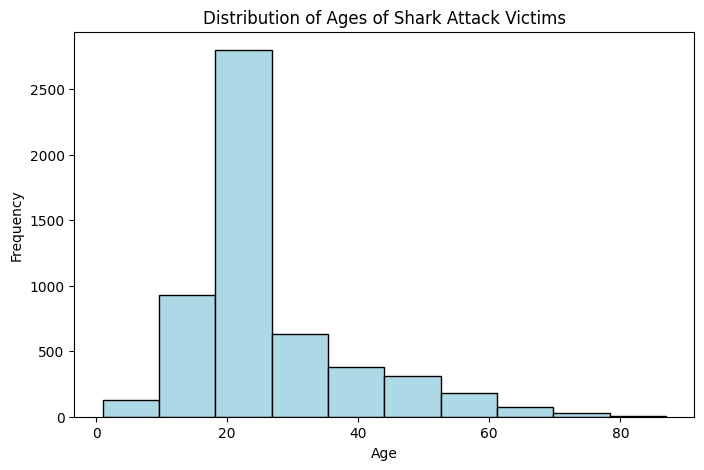

In [14]:
# printing out all unique values of Age variable
print(ds_clean['Age'].unique()) 

# changing all values to integers, if not integer than assigning NaN 
ds_clean['Age'] = pd.to_numeric(ds_clean['Age'], errors='coerce')

# handle specific cases where the 'Age' is still NaN
def handle_special_cases(age):
    # if it's still a string, handle the special cases
    if isinstance(age, str):  
        # if teen, change it randomly to 13-20
        if 'teen' in age:
            return np.random.randint(13, 20)
        # if young, change it randomly to 5-12
        elif 'young' in age:
            return np.random.randint(5, 12)
        # if adult change it randomly to 21-61
        elif 'adult' in age:
            return np.random.randint(21, 61)
    return np.nan


# fill NaNs with median (a default value)
ds_clean['Age'].fillna(ds_clean['Age'].median(), inplace=True)

# reprint new unique values
print("\n ........")
print(ds_clean['Age'].unique()) 

# creating histogram
plt.figure(figsize=(8, 5))
plt.hist(ds_clean['Age'], bins=10, color='lightblue', edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Ages of Shark Attack Victims")
plt.show()


5. What proportion of victims are male?

In [15]:
# printing out all unique values & their counts
print(ds_clean['Sex'].value_counts(dropna=False))

# clean the data by imputing any value that is not 'M', 'F', or NaN
ds_clean['Sex'] = ds_clean['Sex'].replace(' M', 'M')
ds_clean['Sex'] = ds_clean['Sex'].replace('M x 2', 'M')
ds_clean['Sex'] = ds_clean['Sex'].replace('lli', np.nan)

# reprint unique values 
print("\n Cleaning... \n")
print(ds_clean['Sex'].value_counts(dropna=False))

# calculate the proportion of males
m = 4297 + 2 # males
f = 706 # female
nan = 453 # nan
total = m + f + nan # total
pm = m / total # proportion 
print(" ")
print("Proportion of victims that are male: " , pm)

Sex
M        4295
F         706
NaN       452
M           2
 M          1
lli         1
M x 2       1
Name: count, dtype: int64

 Cleaning... 

Sex
M      4297
F       706
NaN     453
M         2
Name: count, dtype: int64
 
Proportion of victims that are male:  0.787651154268963


6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?

In [16]:
# printing out unique values for Type variable
print(ds_clean['Type'].value_counts(dropna=False))

# replace any other values into Provoked, Unprovoked, and Unknown categories
ds_clean['Type'] = ds_clean['Type'].replace(' Provoked', 'Provoked')
ds_clean['Type'] = ds_clean['Type'].replace('Invalid', 'Unknown')
ds_clean['Type'] = ds_clean['Type'].replace('?', 'Unknown')
ds_clean['Type'] = ds_clean['Type'].replace('Questionable', 'Unknown')
ds_clean['Type'] = ds_clean['Type'].replace(np.nan, 'Unknown')
ds_clean['Type'] = ds_clean['Type'].replace('Unverified', 'Unknown')
ds_clean['Type'] = ds_clean['Type'].replace('Unconfirmed', 'Unknown')
ds_clean['Type'] = ds_clean['Type'].replace('Under investigation', 'Unknown')
ds_clean['Type'] = ds_clean['Type'].replace('Watercraft', 'Unknown')
ds_clean['Type'] = ds_clean['Type'].replace('Boat', 'Unknown')
ds_clean['Type'] = ds_clean['Type'].replace('Sea Disaster', 'Unknown')


# print out value counts for each value
print("**** Cleaning ****")
print(ds_clean['Type'].value_counts(dropna=False))

# calculate proportion of unprovoked attacks 
up = 4055 # unprovoked
un = 885 # unknown
p = 518 # provoked
total = up + un +p # total 
pu = up / total # proportion
print(" ")
print("Proportion of attacks that are unprovoked are: " , pu)

Type
Unprovoked             4055
Provoked                516
Invalid                 402
Watercraft              280
Sea Disaster            156
Questionable             22
NaN                      14
Boat                      7
 Provoked                 2
Unconfirmed               1
?                         1
Unverified                1
Under investigation       1
Name: count, dtype: int64
**** Cleaning ****
Type
Unprovoked    4055
Unknown        885
Provoked       518
Name: count, dtype: int64
 
Proportion of attacks that are unprovoked are:  0.7429461341150605


7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.

In [17]:
# printing out unique values for Fatal variable
print(ds_clean['Fatal Y/N'].value_counts(dropna=False)) 

# replace any other values into Y, N, and Unknown categories
ds_clean['Fatal Y/N'] = ds_clean['Fatal Y/N'].replace(' N', 'N')
ds_clean['Fatal Y/N'] = ds_clean['Fatal Y/N'].replace('n', 'N')
ds_clean['Fatal Y/N'] = ds_clean['Fatal Y/N'].replace(2017, 'Y')
ds_clean['Fatal Y/N'] = ds_clean['Fatal Y/N'].replace('Y x 2', 'Y')
ds_clean['Fatal Y/N'] = ds_clean['Fatal Y/N'].replace(np.nan, 'Unknown')
ds_clean['Fatal Y/N'] = ds_clean['Fatal Y/N'].replace('UNKNOWN', 'Unknown')
ds_clean['Fatal Y/N'] = ds_clean['Fatal Y/N'].replace('  N', 'N')
ds_clean['Fatal Y/N'] = ds_clean['Fatal Y/N'].replace('F', 'Unknown')
ds_clean['Fatal Y/N'] = ds_clean['Fatal Y/N'].replace('M', 'Unknown')
ds_clean['Fatal Y/N'] = ds_clean['Fatal Y/N'].replace('Nq', 'Unknown')

# print out value counts for each value
print("**** Cleaning ****")
print(ds_clean['Fatal Y/N'].value_counts(dropna=False))

Fatal Y/N
N          4178
Y           811
NaN         406
UNKNOWN      45
 N            7
F             4
M             3
Nq            1
n             1
2017          1
Y x 2         1
Name: count, dtype: int64
**** Cleaning ****
Fatal Y/N
N          4186
Y           813
Unknown     459
Name: count, dtype: int64


8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?

Sharks are more likely to launch unprovoked attacks on men. The attack is less likely to be fatal when the attack is unprovoked. The attack is less likely to be fatal when the attack is provoked as well. The attack is less likely to be fatal when the victim is male. The attack is also less likely to be fatal when the victim is female. I don't feel too threatened by sharks. According to this data, females are less likely to be in a fatal accident. 

In [18]:
# cross-tabulating unprovoked and sex 
c = pd.crosstab(ds_clean['Type'], ds_clean['Sex'], dropna=False, margins=True)
print(c) 

# cross-tabulating unprovoked and fatal  
c = pd.crosstab(ds_clean['Type'], ds_clean['Fatal Y/N'], dropna=False, margins=True)
print("\n" , c)

# cross-tabulating fatal and sex 
c = pd.crosstab(ds_clean['Fatal Y/N'], ds_clean['Sex'], dropna=False, margins=True)
print("\n", c)

Sex           F     M  M   NaN   All
Type                                
Provoked     28   446   0   44   518
Unknown      78   540   0  267   885
Unprovoked  600  3311   2  142  4055
All         706  4297   2    0  5458

 Fatal Y/N      N  Unknown    Y   All
Type                                
Provoked     496        8   14   518
Unknown      366      399  120   885
Unprovoked  3324       52  679  4055
All         4186      459  813  5458

 Sex          F     M  M   NaN   All
Fatal Y/N                          
N          560  3326   2  298  4186
Unknown     59   321   0   79   459
Y           87   650   0   76   813
All        706  4297   2    0  5458


9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [19]:
# print out unique values for species of shark
print(ds_clean['Species '].value_counts(dropna=False))
dss = ds_clean

# sum up species that contain "White"
w = dss["Species "].astype(str).str.contains("White", na=False).sum()
# add onto w variable for species that contain "white"
w += dss["Species "].astype(str).str.contains("white", na=False).sum()
print("\n num of white sharks:" , w)

# calculate proportion of white sharks
total = dss.shape[0]
pw = w / total
print("Proportion of attacks that appear to be white sharks: " , pw)


Species 
NaN                                                    2071
White shark                                             180
Shark involvement prior to death was not confirmed       98
Shark involvement not confirmed                          86
Invalid                                                  78
                                                       ... 
White shark, 4.2 m [13'9"]                                1
Tiger shark, 4.5 to 5.5 m [14'9" to 18'], 2000-lb         1
1.8 m [6'] blacktip shark or spinner shark                1
Bull sharks to 1.5 m [5']  in length                      1
Bull shark 6ft                                            1
Name: count, Length: 1550, dtype: int64

 num of white sharks: 706
Proportion of attacks that appear to be white sharks:  0.129351410773177


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?

The US Census recently gathered data on race in the 2020 Census. They had specific checkboxes for major racial categories, such as White, Black or African American, American Indian or Alaska Native, Asian, with subcategories, Native Hawaiian or other Pacific Islander, and Other, with a write-in option. 

2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?

We gather these data for legal, social, economic, and policy-making purposes. These purposes include ensuring fair representation, resources are allocated equitably, and helping to understand demographic trends. In term of politics, having race data helps policy-makers identify racial disparities in many aspects of society, such as healthcare, housing, and economic opportunities. In terms of society, having race data helps tailor public health programs to the area so that it is the most effective and beneficial to the residents. Data quality matters because not having accurate representation can distort political power, funding, and resource distribution. 

3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?

I think that the online response submission made it easier for many people to participate. Having an online option made the census more accessible for people, which allows more people to participate and helps the government gain a better representation. While having the census online was good, some people in rural and/or low-income areas might not be able to participate if they don't have internet access. Another aspect that could be improved is having less political interference or impact on the census. Having political pressure and controversy involved with the census might dissuade some people from participating, which is the opposite of the goal of the census. 

Future large scale surveys should be adjusted to best reflect the diversity of the population by improving the methods of dispersion and collection. Having multilingual options for the surveys can make them more accessible, and diverse groups might be more willing to fill them out if they can understand them more clearly. Some of the Census' good practices could definitely be adopted more widely to gather richer and more useful data. One of these practices, such as having multiple ways for people to respond, could be adopted for healthcare and academic surveys. Having multiple options allows people to pick the one that works best for then, and might prompt more people to participate in that survey. 


4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.

The Census gathered data on sex, but not gender identity. When participants were asked about their sex, the two options were "male" or "female." Having only two options limits any possible confusion or hesitation from participants, however excludes much of the US's population who does not identify as either of these two options. These options are the same as previous census collections, which makes it easy and clear when comparing historical data and trends. Once again, these options do not provide a complete picture of the US's population in this time. 

This large scale survey should be adjusted to best reflect the diversity of the population by including a question(s) about sex and gender identity. Sex is more about the biological identity of a person, whereas gender identity is how they personally choose to identify themselves in regards to gender. Having more options and/or more questions about these can help get a more complete picture about the demographic of certain LGBTQ+ groups and those who don't identify as solely male or female. 

5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?


Cleaning data of these protected characteristics might skew the data and not provide an accurate representation of the country and its citizens. Cleaning certain characteristics could lead to biased models if not every group and characteristic is handled in the same way. People might choose to not answer these questions, and therefore contribute to missing values, for many different reasons. These different reasons should not all be grouped into one category, however it might be hard to discover the reasons each person has for not answering. A good practice people might have would be to give a specific reason for not answering a question, or just answering it in the first place. A bad practice people might have would be choosing not to answer certain questions for no reason, or not answering the questions truthfully. Either of these could cause skewed data that doesn't accurately represent the US population.

6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

An algorithm that imputes values for protected characteristics might add in values that don't accurately represent that person. If there is a missing value, there might be a good reason that that person chose to leave that response blank in their submission. Imputing values is not always the best option, especially in this situation where each value represents a real person.